#  Introduction
Early diagnosis of diabetes is important to prevent the onset of complications. In this project, I will analyze the survey data on health indicators that may be associated with diabetes.

I will start by exploring the data in a dataset and then build a model to predict diabetes. I will compare the performance of the model and apply hyperparameter tuning to improve the model performance. The final model will be used to predict diabetes in an imbalanced test dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df= pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [5]:
print(len(df))

70692


In [6]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
# Unique values for all variables
for col in df.columns:
    print(f"{col}: {np.sort(df[col].unique())}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 89. 92. 95. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Education: [1

In [8]:
# Check if the target variable is balanced
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [9]:

cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

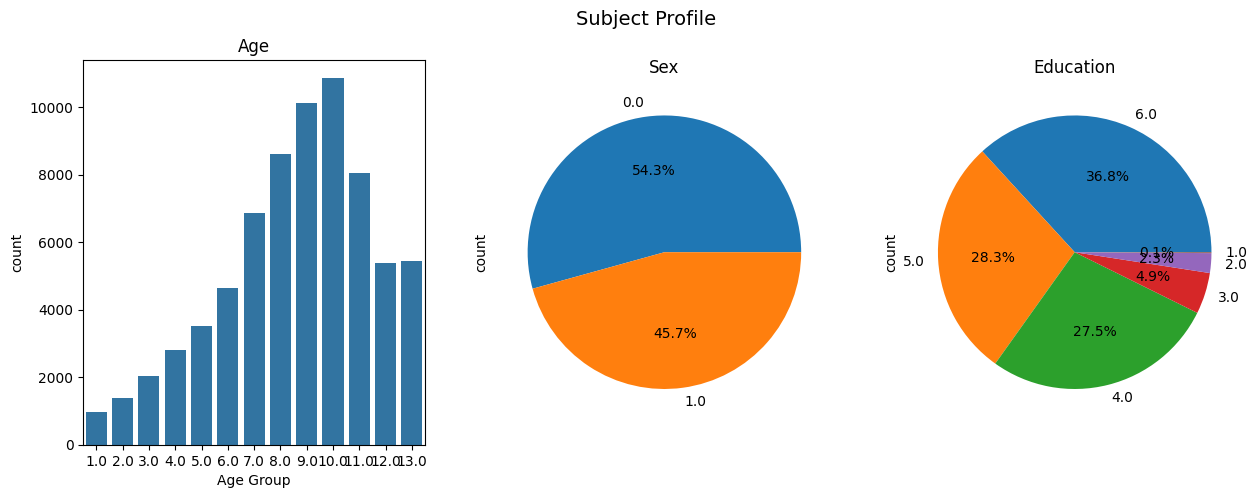

In [10]:
# Visualize social categories
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()



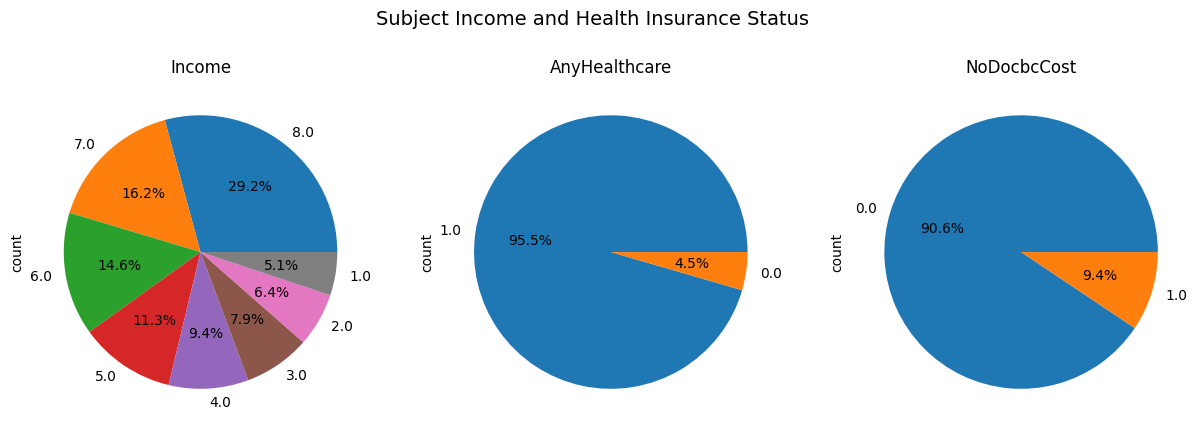

In [11]:
# Visualize economic categories
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

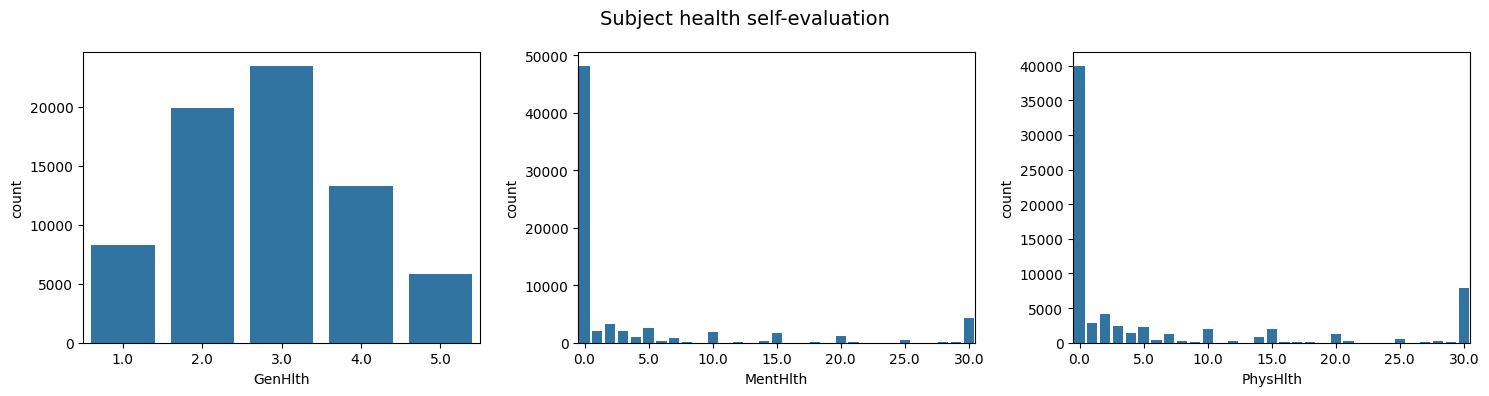

In [12]:
# Health Metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(df[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

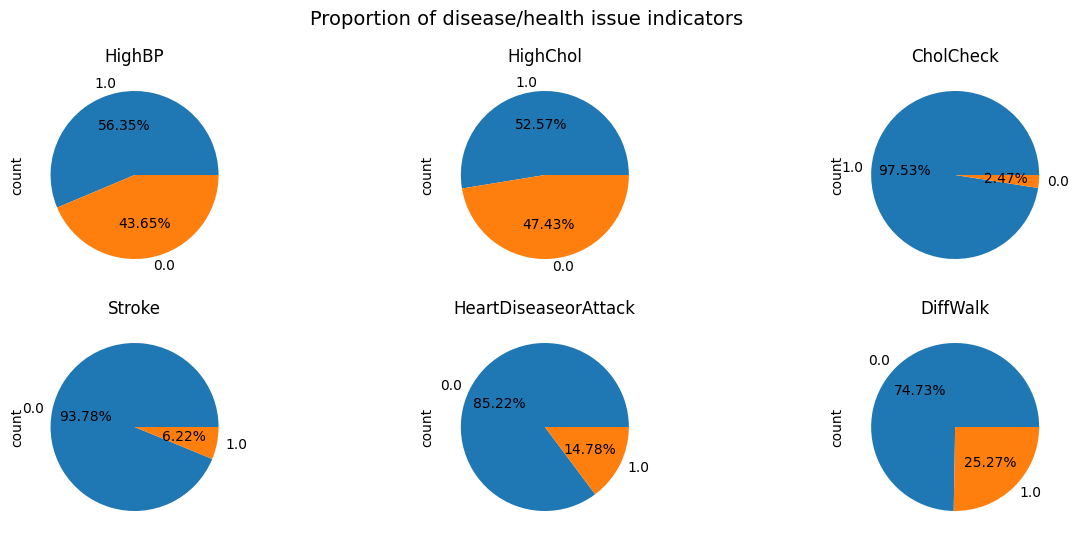

In [13]:
# Distribution of binary health indicators using a pie chart
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i, col in enumerate(cat_disease):
    df[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()

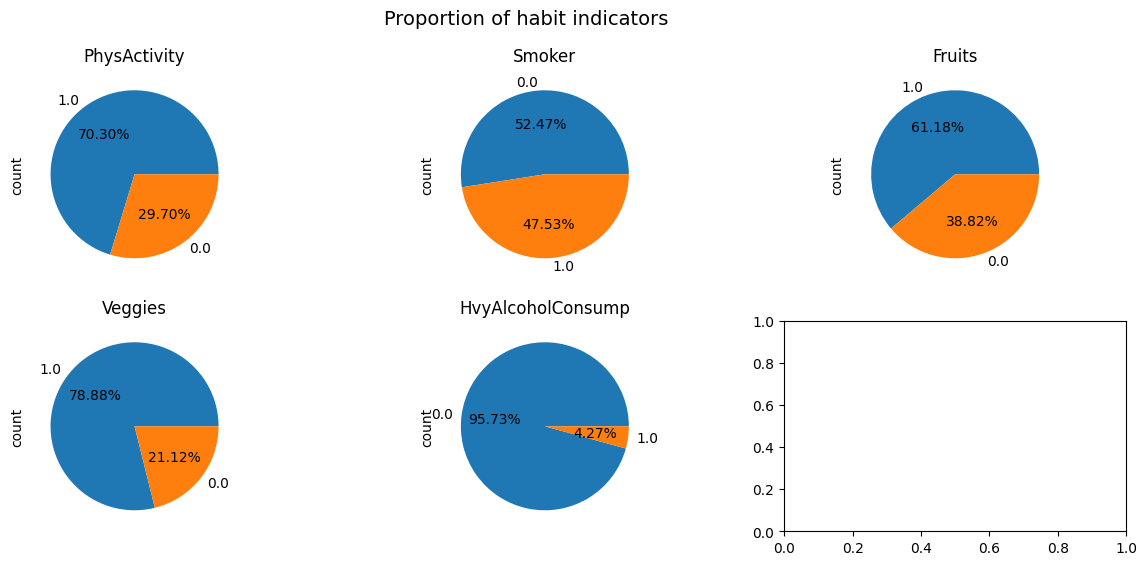

In [14]:
# Distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i, col in enumerate(cat_habit):
    df[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

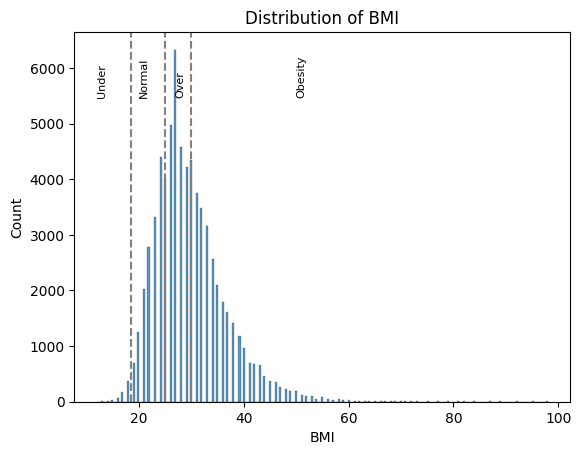

In [15]:
# Distribution of BMI

# The World Health Organization (WHO) defines the following BMI ranges for adults:

# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(df['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

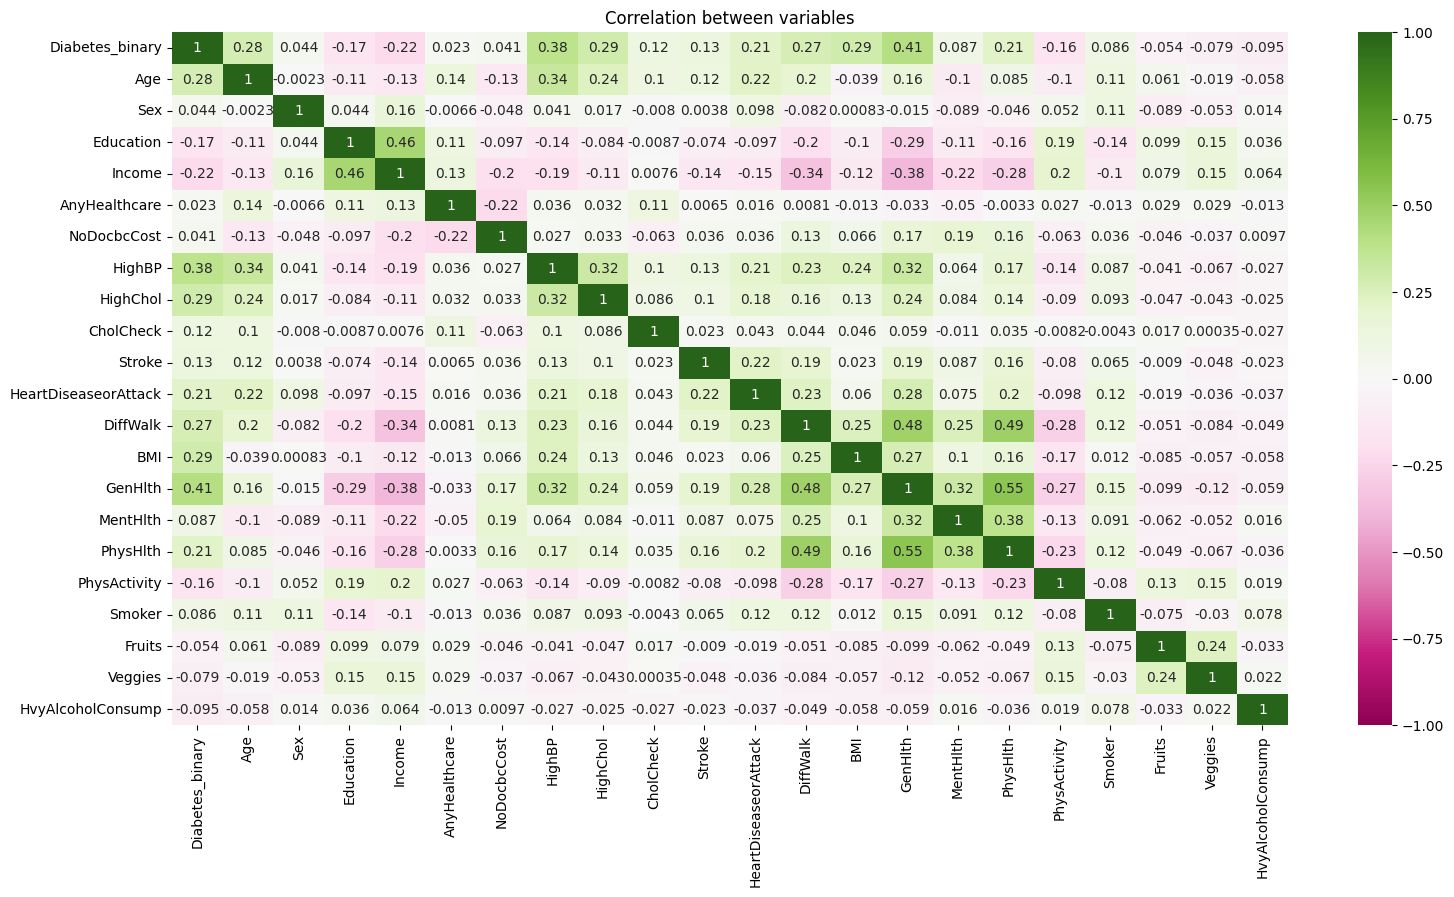

In [16]:
# plot a heatmap to check the correlation between the variables

# for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_binary'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(df[cols].corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

In [18]:
# split the data into X and y
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# split the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.7410000707263598

In [20]:
# Hyperparamerter tuning -Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'solver' : ['liblinear','lbfgs','sag','sags']
}

logistic_grid = GridSearchCV(log_reg,param_grid, cv=5)
logistic_grid.fit(X_train,y_train)

# Get the best parameters and model
best_params = logistic_grid.best_params_
best_logistic = logistic_grid.best_estimator_

print(best_params)

{'C': 100, 'solver': 'liblinear'}


In [21]:
# Fit the best model on the training data
best_logistic.fit(X_train,y_train)
log_pred = best_logistic.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7484263384963576


In [22]:
print(confusion_matrix(log_pred,y_test))

[[5156 1623]
 [1934 5426]]


In [23]:
print(classification_report(log_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      6779
         1.0       0.77      0.74      0.75      7360

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))

0.6470754650258151


In [25]:
# Hyperparameter tuning - DecisionTreeClassifier
param_grid = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [2,5,10,None],
    'min_samples_leaf' : [1,2,4]
}
dt_grid = GridSearchCV(dt, param_grid, cv= 5)

# Train the model
dt_grid.fit(X_train,y_train)

best_params = dt_grid.best_params_
best_dt = dt_grid.best_estimator_

# Fit the best model on the training data
best_dt.fit(X_train, y_train)
dt_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = best_dt.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Decision Tree Accuracy: 0.73520050922979
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
print(confusion_matrix(dt_pred,y_test))

[[4950 1604]
 [2140 5445]]


In [27]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73      6554
         1.0       0.77      0.72      0.74      7585

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.73     14139
weighted avg       0.74      0.74      0.74     14139



In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.7359077728269326


In [29]:
# Hyperparameter tuning - RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5)

# Train the model
rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
best_rf = rf_random.best_estimator_

# Fit the best model on the training data
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Random Forest Accuracy: 0.7359077728269326
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [30]:
print(confusion_matrix(rf_pred,y_test))

[[5005 1447]
 [2085 5602]]


In [31]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74      6452
         1.0       0.79      0.73      0.76      7687

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [32]:
# SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(svc_pred,y_test))

0.7489921493740718


In [33]:
print(confusion_matrix(svc_pred,y_test))

[[4893 1352]
 [2197 5697]]


In [34]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73      6245
         1.0       0.81      0.72      0.76      7894

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



In [35]:
# KNearestClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
print(knc.score(X_test,y_test))

0.7095975670132258


In [36]:
# Hyperparametertuning -KNearestClassifier
param_dist = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}


knc_random = RandomizedSearchCV(knc,param_distributions=param_dist, n_iter=10, cv=5,n_jobs=-1)

# Train the model
knc_random.fit(X_train, y_train)

best_params = knc_random.best_params_
best_knc = knc_random.best_estimator_

# Fit the best model on the training data
best_knc.fit(X_train, y_train)
knc_pred = best_knc.predict(X_test)

# Evaluate the model
accuracy = best_knc.score(X_test, y_test)
print(f"K-Nearest Neighbors Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

K-Nearest Neighbors Accuracy: 0.7197114364523658
Best Parameters: {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'auto'}


In [37]:
print(confusion_matrix(knc_pred,y_test))

[[4863 1736]
 [2227 5313]]


In [38]:
print(classification_report(knc_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71      6599
         1.0       0.75      0.70      0.73      7540

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



In [39]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
print(g_nb.score(X_test, y_test))

0.7180140038192234


In [40]:
# Hyperparameter tuning GaussianNB
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

g_nb_random = RandomizedSearchCV(g_nb, param_distributions=param_dist, n_iter=100, cv=5, random_state=42,n_jobs=-1)

# Train the model
g_nb_random.fit(X_train, y_train)

best_params = g_nb_random.best_params_
best_g_nb = g_nb_random.best_estimator_

# Fit the best model on the training data
best_g_nb.fit(X_train, y_train)
g_nb_pred = best_g_nb.predict(X_test)

# Evaluate the model
accuracy = best_g_nb.score(X_test, y_test)
print(f"Best GaussianNB Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Best GaussianNB Accuracy: 0.7180140038192234
Best Parameters: {'var_smoothing': 4.3287612810830526e-07}


In [41]:
print(confusion_matrix(g_nb_pred,y_test))

[[5139 2036]
 [1951 5013]]


In [42]:
print(classification_report(g_nb_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      7175
         1.0       0.71      0.72      0.72      6964

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



In [43]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
print(gbm.score(X_test, y_test))

0.7535893627554989


In [44]:
# Hyperparameter tuning - GradientBoostingClassifier
param_dist = {
    'n_estimators': [100, 200],  # Number of boosting stages
    'learning_rate': [0.1, 0.01],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of individual trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required at each leaf node
}

# Initialize RandomizedSearchCV for hyperparameter tuning
gbm_random = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42,n_jobs=-1)

# Train the model
gbm_random.fit(X_train, y_train)

best_params = gbm_random.best_params_
best_gbm = gbm_random.best_estimator_

# Fit the best model on the training data
best_gbm.fit(X_train, y_train)
gbm_pred = best_gbm.predict(X_test)

# Evaluate the model
accuracy = best_gbm.score(X_test, y_test)
print(f"Best GBM Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Best GBM Accuracy: 0.7556404271872127
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


In [45]:
print(confusion_matrix(gbm_pred,y_test))

[[5051 1416]
 [2039 5633]]


In [46]:
print(classification_report(gbm_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.75      6467
         1.0       0.80      0.73      0.77      7672

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



In [48]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
print(xgb.score(X_test,y_test))

0.7484263384963576


In [49]:
# Define hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the tree
}

xgb_random = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Train the model
xgb_random.fit(X_train, y_train)


best_params = xgb_random.best_params_
best_xgb = xgb_random.best_estimator_

# Fit the best model on the training data
best_xgb.fit(X_train, y_train)
xgb_pred = best_xgb.predict(X_test)

# Evaluate the model
accuracy = best_xgb.score(X_test,y_test)
print(f"Best XGBoost Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Best XGBoost Accuracy: 0.7552160690289271
Best Parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


In [50]:
print(accuracy_score(xgb_pred,y_test))

0.7552160690289271


In [51]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6415
           1       0.80      0.73      0.77      7724

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.76     14139



We are going to choose our model as XGBClassifier.


In [52]:
# Best XGBClassifier
from xgboost import XGBClassifier

xgb_fin = XGBClassifier(n_estimators= 100, max_depth= 4, learning_rate= 0.1)
xgb_fin.fit(X_train, y_train)
predictions = xgb_fin.predict(X_test)
print(xgb_fin.score(X_test,y_test))

0.7552160690289271


In [53]:
# Check the raw data
input_data = np.array([0,0,1,20,0,0,0,1,1,1,0,1,0,2,0,0,0,0,8,6,8]).reshape(1, -1)

prediction = xgb_fin.predict(input_data)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic
